# Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from IPython.core import display as ICD
from itertools import combinations

# Import Data + Preprocessing 
1. Replace NaN by 0
2. Rename first Column

In [2]:
data = 'city_UrbanAtlas_l1_ratios.csv'
df = pd.read_csv(data)
df = df.fillna(0)
df = df.rename(columns={"Unnamed: 2": "No Class"})

In [3]:
df.head()

,cc_code_short,cc_name,No Class,Agricultural areas,Artificial surfaces,Natural and semi-natural areas,Water,Wetlands
0,AL001,Tirana(FUA name),0.0,0.142073,0.773865,0.064179,0.013398,0.006484
1,AL003,Elbasan(FUA name),0.0,0.072055,0.656564,0.271382,0.000000,0.000000
2,AL004,ShkodÃ«r(FUA name),0.0,0.321917,0.605617,0.052717,0.015167,0.004583
3,AT001,Wien,0.0,0.158471,0.623209,0.182559,0.035760,0.000000
4,AT002,Graz,0.0,0.145966,0.585422,0.261324,0.007288,0.000000


# Remove No-data cities (above 0.5 of no-class ratio)

In [5]:
df = df[df['No Class']<0.5]

# Get Features
We have 6 features: 5 classes ratios + non-classified regions

In [6]:
X = df.copy()
y = df['cc_name']
X.drop(['cc_code_short', 'cc_name', 'No Class'], axis=1, inplace=True)
X.head()

,Agricultural areas,Artificial surfaces,Natural and semi-natural areas,Water,Wetlands
0,0.142073,0.773865,0.064179,0.013398,0.006484
1,0.072055,0.656564,0.271382,0.000000,0.000000
2,0.321917,0.605617,0.052717,0.015167,0.004583
3,0.158471,0.623209,0.182559,0.035760,0.000000
4,0.145966,0.585422,0.261324,0.007288,0.000000


# K-Means call with Elbow method
To find the optimal K

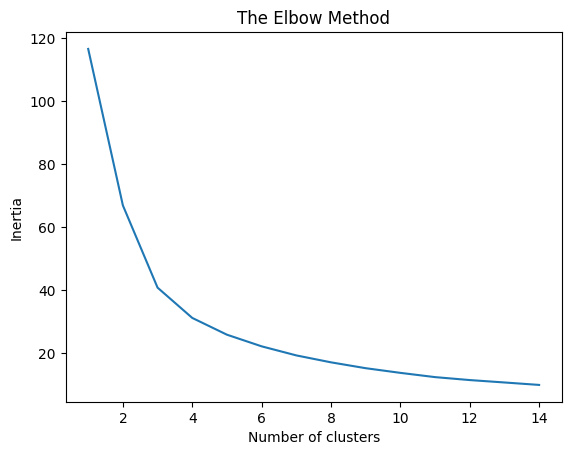

In [7]:
cs = []
max = 15
for i in range(1, max):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, max), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Use K = 4
According to the above plot, 4 looks a good condidate (the elbow point)

In [8]:
k = 4
kmeans = KMeans(n_clusters = k, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit(X)
df['label'] = kmeans.labels_

# Statistics

In [9]:
print("Inertia: ", kmeans.inertia_)
print("Number of clusters: ", kmeans.n_clusters)
u_labels = np.unique(kmeans.labels_)
for i in u_labels:
    print("Number of elements clustered as ", i, "->", len(df[df['label'] == i]))

Inertia:  31.248520762207274
Number of clusters:  4
Number of elements clustered as  0 -> 246
Number of elements clustered as  1 -> 225
Number of elements clustered as  2 -> 311
Number of elements clustered as  3 -> 204


<Axes: xlabel='label'>

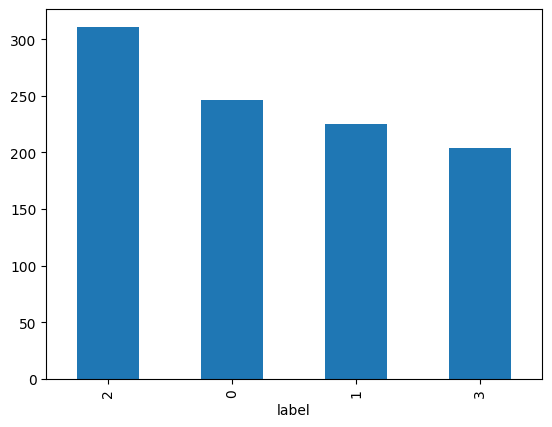

In [10]:
fig, ax = plt.subplots()
df['label'].value_counts().plot(ax=ax, kind='bar')

# Overview of every cluster

In [11]:
for i in u_labels:
    ICD.display(df[df['label'] == i])

/tmp/ipykernel_142/2534644550.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  ICD.display(df[df['label'] == i])


,cc_code_short,cc_name,No Class,Agricultural areas,Artificial surfaces,Natural and semi-natural areas,Water,Wetlands,label
0,AL001,Tirana(FUA name),0.0,0.142073,0.773865,0.064179,0.013398,0.006484,0
1,AL003,Elbasan(FUA name),0.0,0.072055,0.656564,0.271382,0.000000,0.000000,0
3,AT001,Wien,0.0,0.158471,0.623209,0.182559,0.035760,0.000000,0
9,BA001,Sarajevo(FUA name),0.0,0.209529,0.698599,0.082748,0.009125,0.000000,0
10,BA002,Banja Luka(FUA name),0.0,0.222430,0.677900,0.088222,0.011449,0.000000,0
...,...,...,...,...,...,...,...,...,...
1023,UK569,Ipswich,0.0,0.111006,0.861176,0.024203,0.003615,0.000000,0
1029,UK577,Watford,0.0,0.033339,0.931243,0.033736,0.001681,0.000000,0
1030,UK578,Gosport,0.0,0.112366,0.814746,0.058873,0.014014,0.000000,0
1039,XK001,Pristina(FUA name),0.0,0.233159,0.754855,0.011986,0.000000,0.000000,0


/tmp/ipykernel_142/2534644550.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  ICD.display(df[df['label'] == i])


,cc_code_short,cc_name,No Class,Agricultural areas,Artificial surfaces,Natural and semi-natural areas,Water,Wetlands,label
7,AT005,Innsbruck,0.000000,0.080145,0.232660,0.676473,0.010722,0.000000,1
8,AT006,Klagenfurt,0.000000,0.301139,0.354762,0.331709,0.012390,0.000000,1
27,BG003,Varna,0.000000,0.137210,0.461117,0.347825,0.051296,0.002551,1
29,BG005,Pleven,0.000000,0.334877,0.335409,0.322035,0.007679,0.000000,1
32,BG008,Stara Zagora,0.000000,0.397743,0.304874,0.295983,0.001400,0.000000,1
...,...,...,...,...,...,...,...,...,...
956,UK502,North Lanarkshire (Airdrie/Bellshill/Coatbridg...,0.000000,0.356499,0.301292,0.323921,0.015648,0.002641,1
975,UK521,Oldham,0.000000,0.270194,0.403932,0.316274,0.009600,0.000000,1
980,UK526,Rochdale,0.000000,0.312242,0.379942,0.289124,0.018459,0.000233,1
1011,UK557,Blackburn with Darwen,0.000000,0.321241,0.295601,0.364087,0.019070,0.000000,1


/tmp/ipykernel_142/2534644550.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  ICD.display(df[df['label'] == i])


,cc_code_short,cc_name,No Class,Agricultural areas,Artificial surfaces,Natural and semi-natural areas,Water,Wetlands,label
2,AL004,ShkodÃ«r(FUA name),0.000000,0.321917,0.605617,0.052717,0.015167,0.004583,2
4,AT002,Graz,0.000000,0.145966,0.585422,0.261324,0.007288,0.000000,2
5,AT003,Linz,0.000000,0.206367,0.569233,0.170850,0.053551,0.000000,2
6,AT004,Salzburg,0.000195,0.244958,0.581509,0.153072,0.020266,0.000000,2
12,BA004,Tuzla(FUA name),0.000000,0.230553,0.541058,0.227463,0.000926,0.000000,2
...,...,...,...,...,...,...,...,...,...
992,UK538,Basildon,0.000000,0.404551,0.528488,0.040743,0.008863,0.017356,2
1001,UK547,South Tyneside,0.000861,0.337779,0.646306,0.010711,0.004342,0.000000,2
1024,UK571,Cheltenham,0.000000,0.311982,0.673388,0.014630,0.000000,0.000000,2
1031,UK579,Eastleigh,0.000000,0.238650,0.543724,0.207776,0.004026,0.005823,2


/tmp/ipykernel_142/2534644550.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  ICD.display(df[df['label'] == i])


,cc_code_short,cc_name,No Class,Agricultural areas,Artificial surfaces,Natural and semi-natural areas,Water,Wetlands,label
28,BG004,Burgas,0.000297,0.518296,0.184844,0.070411,0.201174,0.024978,3
30,BG006,Ruse,0.000000,0.511227,0.302083,0.108604,0.078086,0.000000,3
31,BG007,Vidin,0.068871,0.622077,0.255221,0.052123,0.001708,0.000000,3
34,BG010,Dobrich,0.000000,0.709462,0.229211,0.058598,0.001779,0.000950,3
35,BG011,Shumen,0.000000,0.546895,0.201129,0.243116,0.008691,0.000169,3
...,...,...,...,...,...,...,...,...,...
1018,UK564,Warwick,0.000942,0.708284,0.234150,0.050480,0.006144,0.000000,3
1019,UK565,Newcastle-under-Lyme,0.000993,0.651092,0.251118,0.093509,0.002647,0.000640,3
1022,UK568,Cheshire West and Chester,0.000577,0.682652,0.232026,0.036567,0.012794,0.035383,3
1033,UK581,Rugby,0.000000,0.790722,0.169641,0.025630,0.014007,0.000000,3


# Plot the clusters 
For every pair of attributes, plot the 4 clusters

In [14]:
features = [*range(3, len(X.columns)+3)]
pairs = list(combinations(features, 2))

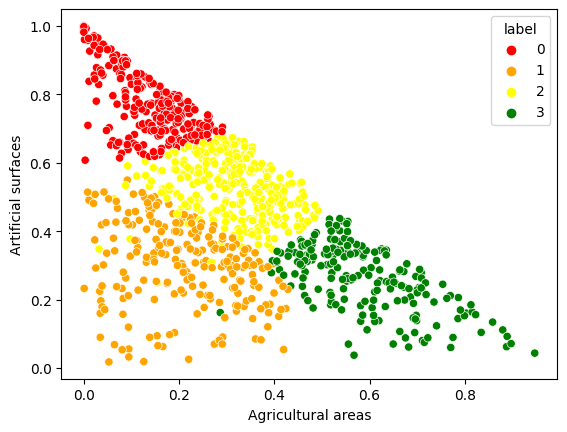

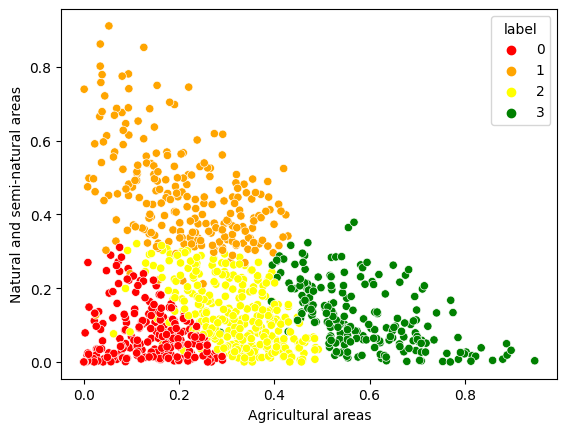

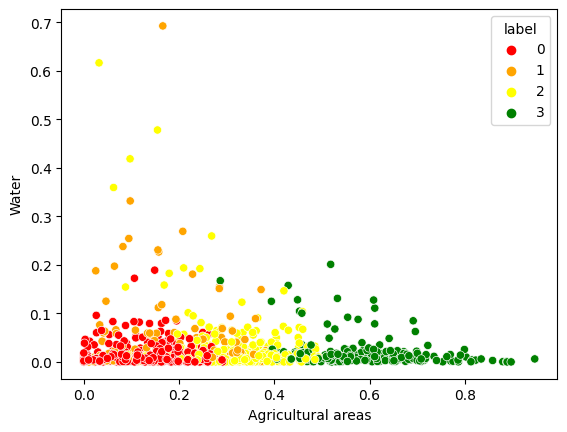

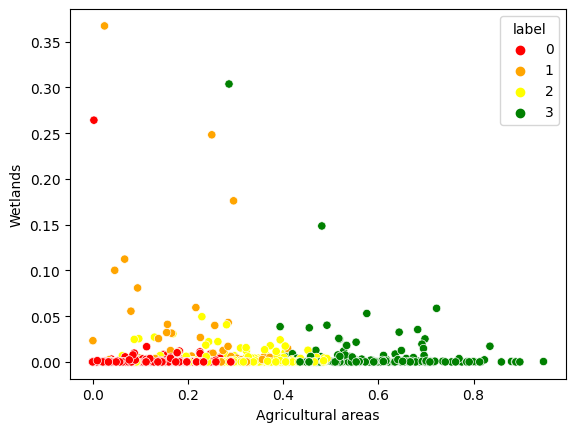

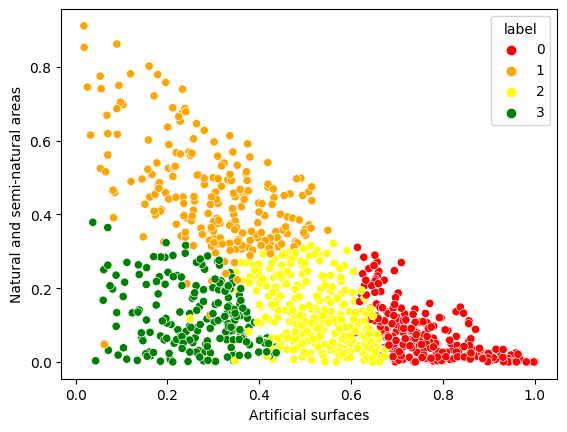

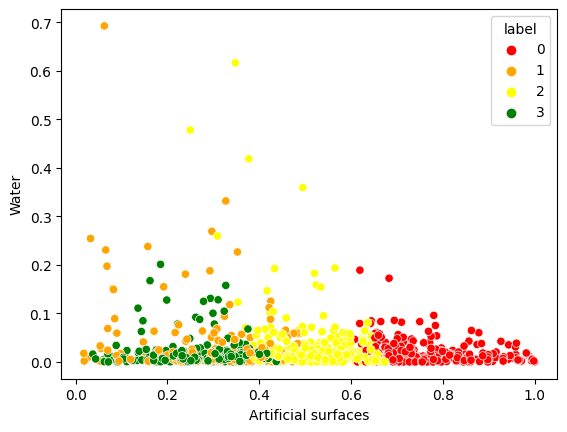

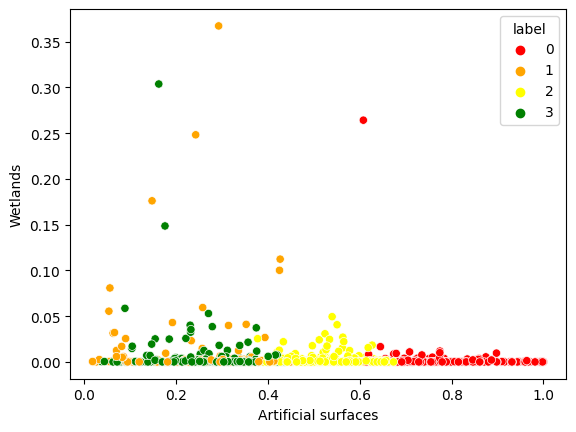

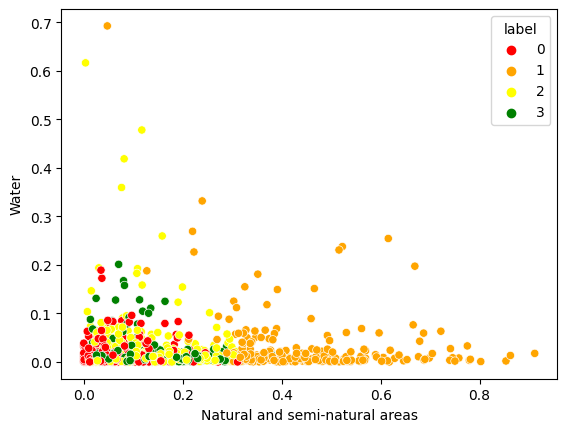

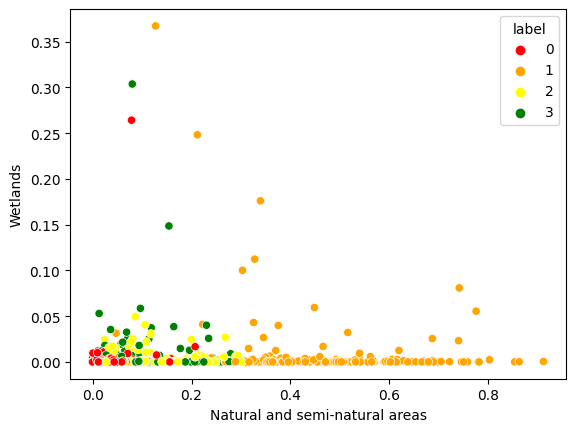

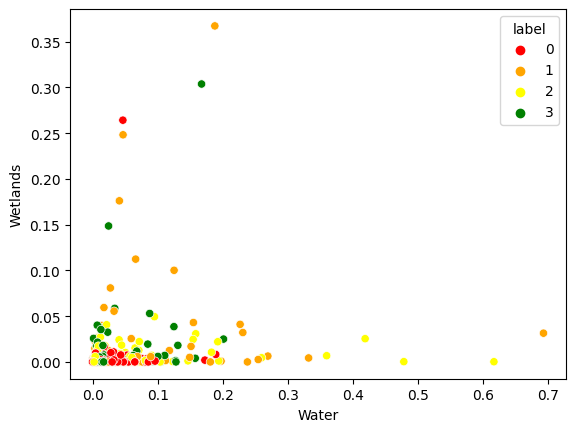

In [15]:
import seaborn as sns
columns= df.columns.values.tolist()
for j in pairs:
    fig, ax = plt.subplots()
    ax = sns.scatterplot(x=columns[j[0]],y=columns[j[1]],hue = 'label',data = df,legend='full',
                         palette = {0:'red',1:'orange',2:'yellow',3:'green'})
    plt.xlabel(columns[j[0]])
    plt.ylabel(columns[j[1]])
    plt.show()

# Conclusion 
The clusters have this possible significations:
1. Cluster 0: Cities with more Artificial surfaces.
2. Cluster 1: Cities with more Natural and semi-natural areas.
3. Cluster 2: Cities with more .
4. Cluster 3: Cities with more Agricultural areas.